Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from spacy import load
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

Loading Data

In [2]:
path = "C:/Users/user/Downloads/DiceyTechHack"
data = pd.read_csv(path +"/FacebookData.csv",encoding="utf-8")

Data Familirization

In [3]:
data.head(2)

,Date,Content Type,Sent by,Post,Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,Non-fan Impressions,Reach,...,95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Unique Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Tags
0,12/17/2022 17:08,Video,Damilare Oyekanmi,"We celebrated recently with Novare, one of our...",207378,5,207373,1147,206231,207378,...,19,84,3,14825,975,263,62,19,0,CIB Posts
1,5/4/2019 10:01,Photo,,N5k can get you started today. Call 01 280 126...,125784,23926,101858,103287,22497,92009,...,0,0,0,0,0,0,0,0,0,Other


Data Preprocessing

In [4]:
data["Date"] = pd.to_datetime(data["Date"])
data["PostHour"] = data["Date"].dt.hour
data["PostMonth"] = data["Date"].dt.month_name()
data["PostYear"] = data["Date"].dt.year

In [5]:
data["Post"].dtypes

dtype('O')

SENTIMENT, TOPIC, AND ENTITY RECOGNITION

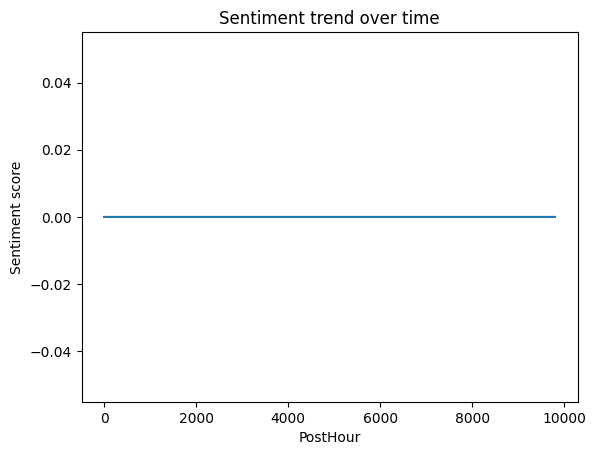

In [16]:
import re
df = pd.read_csv(path + '/FacebookData.csv', usecols=["Post"])

df['Post'] = df['Post'].astype(str)

sentiment_analyzer = SentimentIntensityAnalyzer()
sentiment_scores = []
for post in df['Post']:
    sentiment_score = sentiment_analyzer.polarity_scores(post)['compound']
    sentiment_scores.append(int(sentiment_score))

df['sentiment_score'] = sentiment_scores

# topic modeling
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Post'])

lda = LatentDirichletAllocation(n_components=10)
lda_model = lda.fit(X)

topics = lda_model.components_
topic_names = ['Topic {}'.format(i) for i in range(len(topics))]

df['topic'] = lda_model.transform(X).argmax(axis=1)

#entity recognition
nlp = load('en_core_web_sm')
entities = []
for post in df['Post']:
    doc = nlp(post)
    entities.append([entity.text for entity in doc.ents])

df['entities'] = entities

# keyword analysis
keywords = []
for post in df['Post']:
    words = re.split(r'\W', post.lower())
    keywords.append(Counter(words).most_common(10))

df['keywords'] = keywords

# Identify trends
plt.plot(df['sentiment_score'])
plt.xlabel('PostHour')
plt.ylabel('Sentiment score')
plt.title('Sentiment trend over time')
plt.show()

In [29]:
data["Topic"] = df["topic"]
data["Entities"] = df["entities"]
data["Keywords"] = df["keywords"]

In [30]:
data.head(2)

,Date,Content Type,Sent by,Post,Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,Non-fan Impressions,Reach,...,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Tags,PostHour,PostMonth,PostYear,Topic,Entities,Keywords
0,2022-12-17 17:08:00,Video,Damilare Oyekanmi,"We celebrated recently with Novare, one of our...",207378,5,207373,1147,206231,207378,...,62,19,0,CIB Posts,17,December,2022,9,"Novare, one, 6th, Novare Lekki, TrustedPartner...","('', 5), ('novare', 2), ('of', 2), ('we', 1), ..."
1,2019-05-04 10:01:00,Photo,,N5k can get you started today. Call 01 280 126...,125784,23926,101858,103287,22497,92009,...,0,0,0,Other,10,May,2019,9,"N5k, today, 280, 1266","('', 2), ('n5k', 1), ('can', 1), ('get', 1), (..."


In [6]:
data.columns

Index(['Date', 'Content Type', 'Sent by', 'Post', 'Impressions',
       'Viral Impressions', 'Non-viral Impressions', 'Fan Impressions',
       'Non-fan Impressions', 'Reach', 'Viral Reach', 'Non-viral Reach',
       'Fan Reach', 'Engagement Rate (per Impression)',
       'Engagement Rate (per Reach)', 'Engagements', 'Reactions', 'Likes',
       'Love Reactions', 'Haha Reactions', 'Wow Reactions', 'Sad Reactions',
       'Angry Reactions', 'Comments', 'Shares', 'Click-Through Rate',
       'Post Link Clicks', 'Other Post Clicks', 'Post Clicks (All)',
       'Post Photo View Clicks', 'Post Video Play Clicks', 'Negative Feedback',
       'Engaged Users', 'Engaged Fans', 'Users Talking About This',
       'Unique Reactions', 'Unique Comments', 'Unique Shares',
       'Unique Post Clicks', 'Unique Post Link Clicks',
       'Unique Post Photo View Clicks', 'Unique Post Video Play Clicks',
       'Unique Other Post Clicks', 'Unique Negative Feedback', 'Video Views',
       'Partial Video Vie

Text Analysis - Word Cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


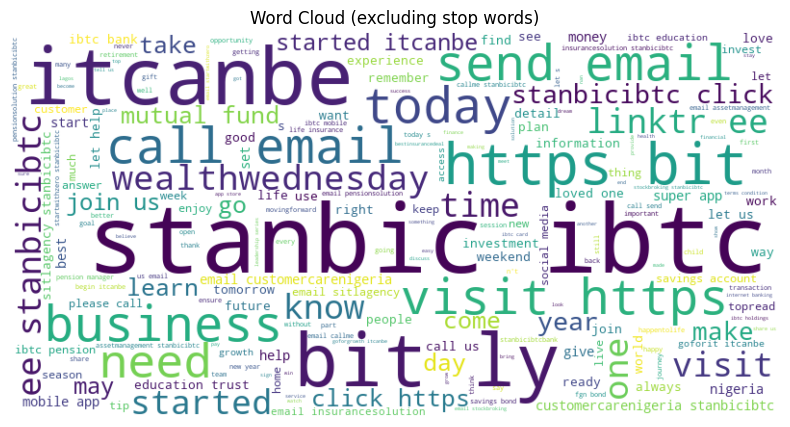

In [28]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Combine all the text from the 'post' column into a single string
all_text = ' '.join(df['Post'])

# Tokenize the text
tokens = word_tokenize(all_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

# Join the filtered tokens back into a string
filtered_text = ' '.join(filtered_tokens)

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (excluding stop words)')
plt.show()

Content Type Analysis AND Visualizing - Content Type Analysis

Text(0.5, 1.0, 'Engagements by Content Type')

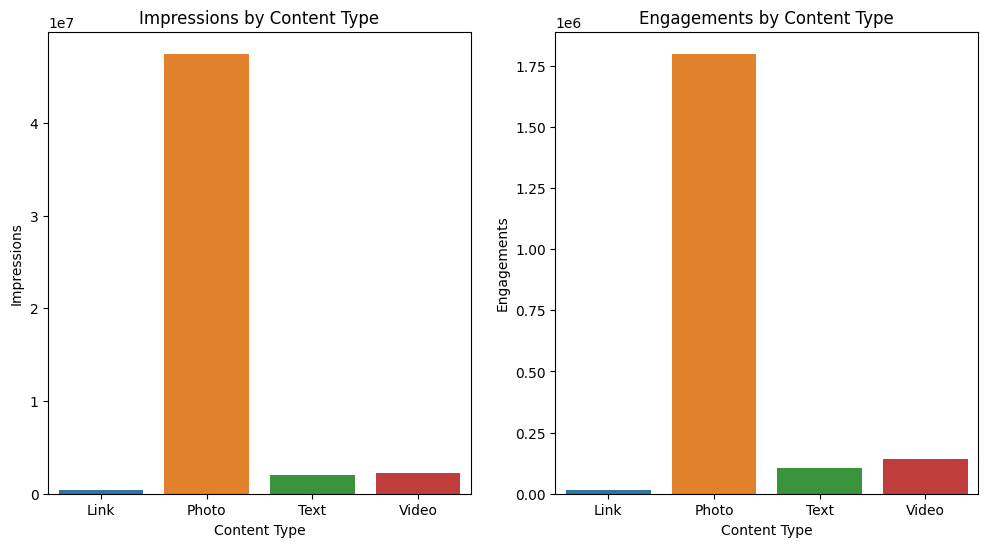

In [11]:
content_type_data = data.groupby('Content Type').sum().reset_index()

#Plotting Content Type Analysis
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = "Content Type", y = "Impressions",data = content_type_data)
plt.title("Impressions by Content Type")

plt.subplot(1,2,2)
sns.barplot(x = "Content Type", y = "Engagements",data = content_type_data)
plt.title("Engagements by Content Type")

Aggregating Data by Content Type AND Visualizing - Aggregated Data by Content Type

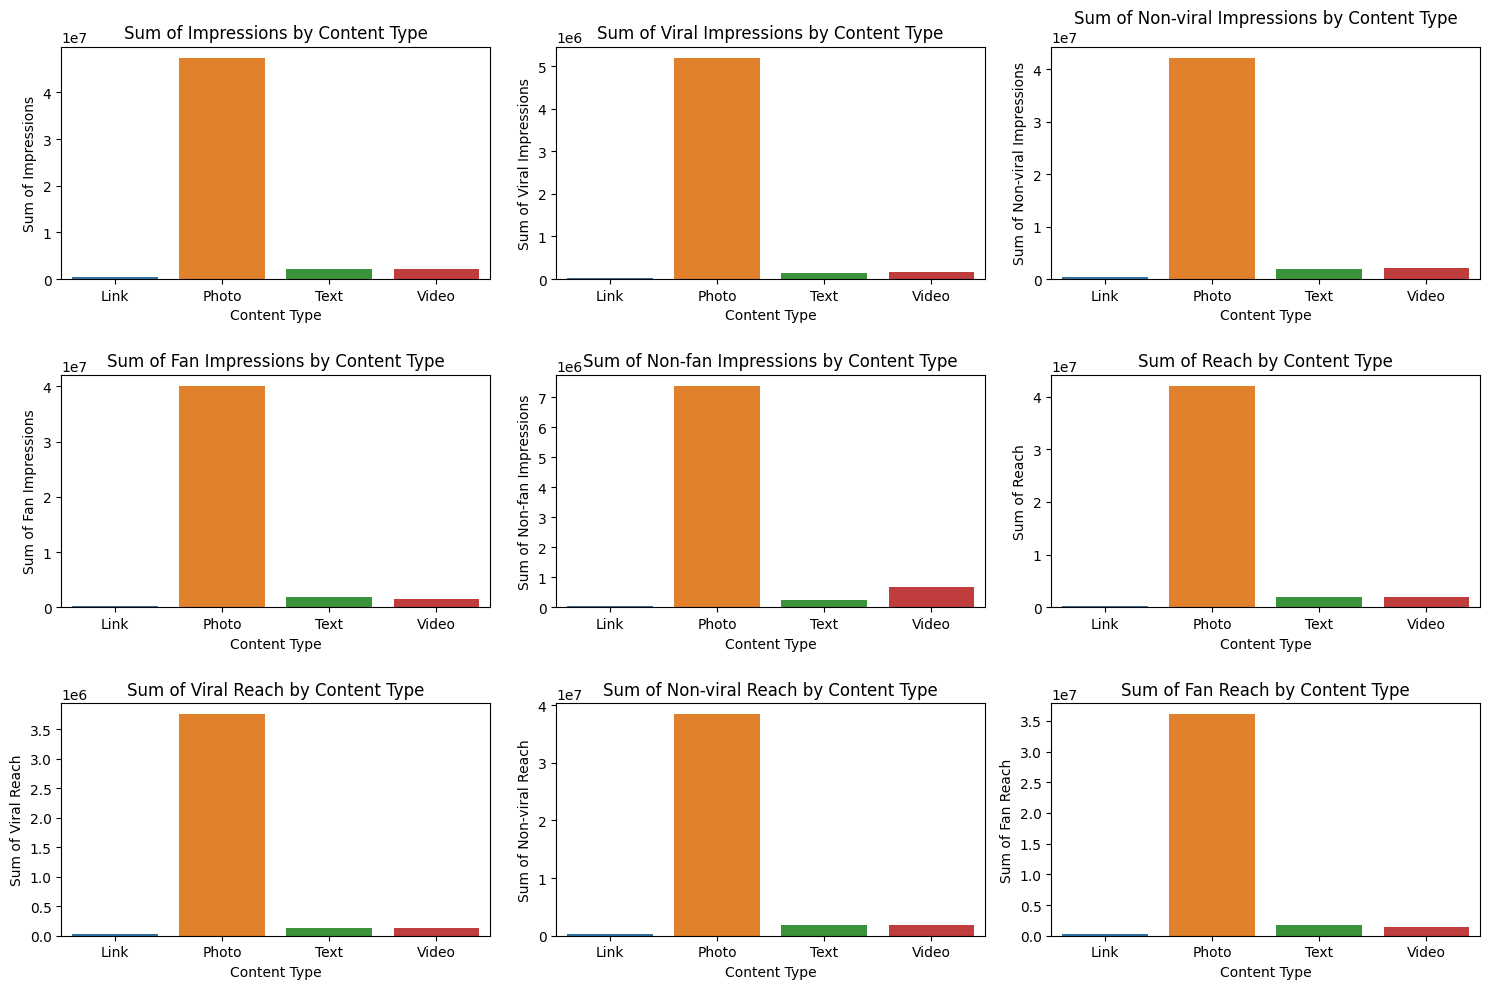

In [9]:
columns_to_sum = ['Impressions',
                  'Viral Impressions', 
                  'Non-viral Impressions', 
                  'Fan Impressions',
                  'Non-fan Impressions', 
                  'Reach', 
                  'Viral Reach', 
                  'Non-viral Reach',
                  'Fan Reach'
]

sums_df = pd.DataFrame(columns=["Content Type"] + columns_to_sum)

for content_type, content_group in data.groupby("Content Type"):
    sum_values = [content_type]

    for column in columns_to_sum:
        column_sum = content_group[column].sum()
        sum_values.append(column_sum)

    sums_df.loc[len(sums_df)] = sum_values

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(columns_to_sum):
    ax = axes[i // 3, i % 3]
    sns.barplot(x='Content Type', y=column, data=sums_df, ax=ax)
    ax.set_title(f"Sum of {column} by Content Type")
    ax.set_xlabel("Content Type")
    ax.set_ylabel(f"Sum of {column}")

fig.tight_layout()

Visualization - Engagement Metrics by Content Type

In [34]:
engaged_users = data["Engaged Users"].sum()
engaged_fans = data["Engaged Fans"].sum()
users_talking_about_this = data['Users Talking About This'].sum()

# Analyze negative feedback metrics
negative_feedback = data['Negative Feedback'].sum()

# Analyze video views
video_views = data['Video Views'].sum()

# Analyze unique metrics
unique_reactions = data['Unique Reactions'].sum()
unique_comments = data['Unique Comments'].sum()
unique_shares = data['Unique Shares'].sum()
unique_post_clicks = data['Unique Post Clicks'].sum()

# Print the results
print("Engaged Users:", engaged_users)
print("Engaged Fans:", engaged_fans)
print("Users Talking About This:", users_talking_about_this)
print("Negative Feedback:", negative_feedback)
print("Total Video Views:", video_views)
print("Unique Reactions:", unique_reactions)
print("Unique Comments:", unique_comments)
print("Unique Shares:", unique_shares)
print("Unique Post Clicks:", unique_post_clicks)

Engaged Users: 1239688
Engaged Fans: 1031535
Users Talking About This: 621670
Negative Feedback: 2913
Total Video Views: 216733
Unique Reactions: 522319
Unique Comments: 100717
Unique Shares: 47525
Unique Post Clicks: 739121


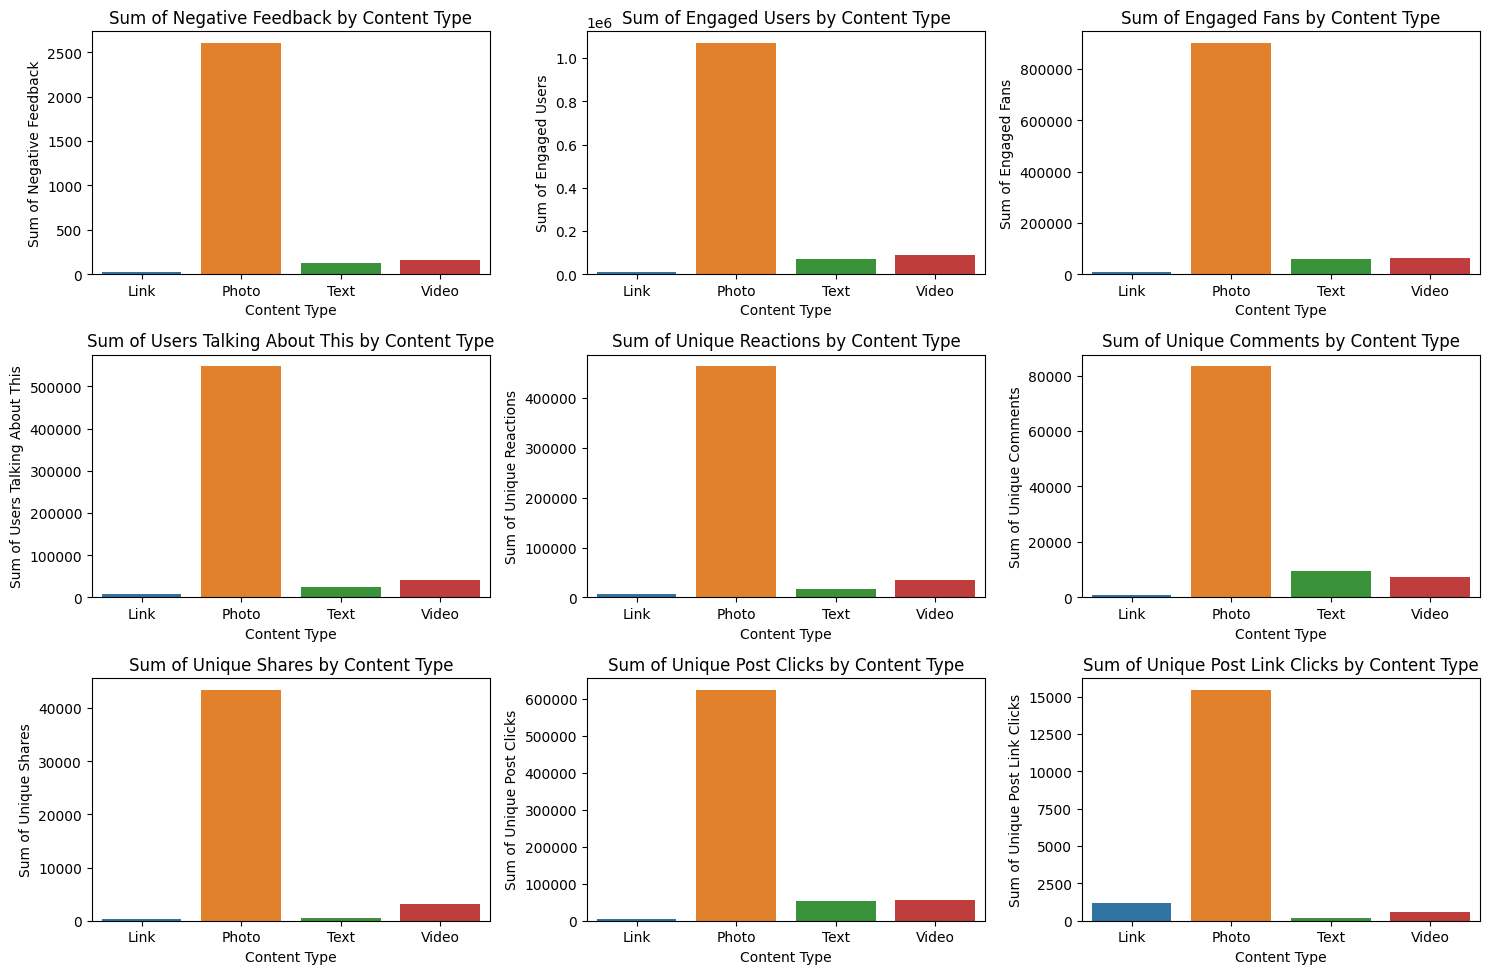

In [10]:
reaction_columns = ['Negative Feedback',
                    'Engaged Users', 
                    'Engaged Fans', 
                    'Users Talking About This',
                    'Unique Reactions', 
                    'Unique Comments', 
                    'Unique Shares',
                    'Unique Post Clicks', 
                    'Unique Post Link Clicks']


sums_df = pd.DataFrame(columns=["Content Type"] + reaction_columns)

for content_type, content_group in data.groupby("Content Type"):
    sum_values = [content_type]

    for column in reaction_columns:
        column_sum = content_group[column].sum()
        sum_values.append(column_sum)

    sums_df.loc[len(sums_df)] = sum_values

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(reaction_columns):
    ax = axes[i // 3, i % 3]
    sns.barplot(x='Content Type', y=column, data=sums_df, ax=ax)
    ax.set_title(f"Sum of {column} by Content Type")
    ax.set_xlabel("Content Type")
    ax.set_ylabel(f"Sum of {column}")

# Adjust the subplot layout
fig.tight_layout()

Visualization - Individual Reactions

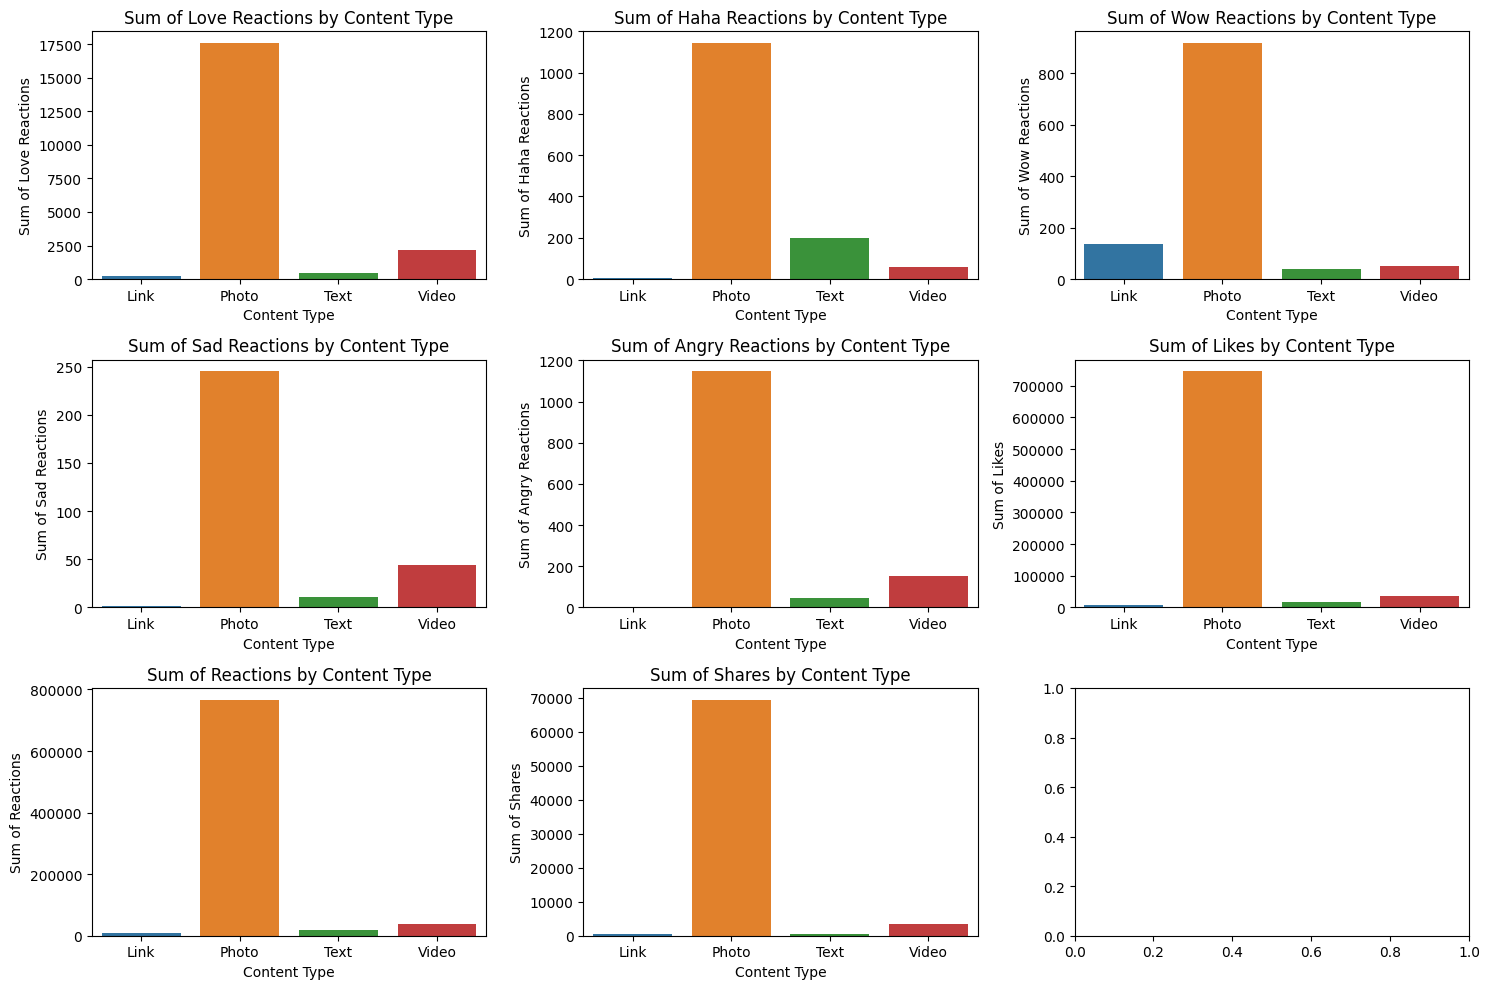

In [ ]:
reaction_columns = ["Love Reactions", "Haha Reactions", "Wow Reactions", "Sad Reactions",
                   "Angry Reactions", "Likes","Reactions","Shares"]

sums_df = pd.DataFrame(columns=["Content Type"] + reaction_columns)

for content_type, content_group in data.groupby("Content Type"):
    sum_values = [content_type]

    for column in reaction_columns:
        column_sum = content_group[column].sum()
        sum_values.append(column_sum)

    sums_df.loc[len(sums_df)] = sum_values

# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Plot each bar chart in a different subplot
for i, column in enumerate(reaction_columns):
    ax = axes[i // 3, i % 3]
    sns.barplot(x='Content Type', y=column, data=sums_df, ax=ax)
    ax.set_title(f"Sum of {column} by Content Type")
    ax.set_xlabel("Content Type")
    ax.set_ylabel(f"Sum of {column}")

# Adjust the subplot layout
fig.tight_layout()

# Show the plot
plt.show()

Hourly Analysis

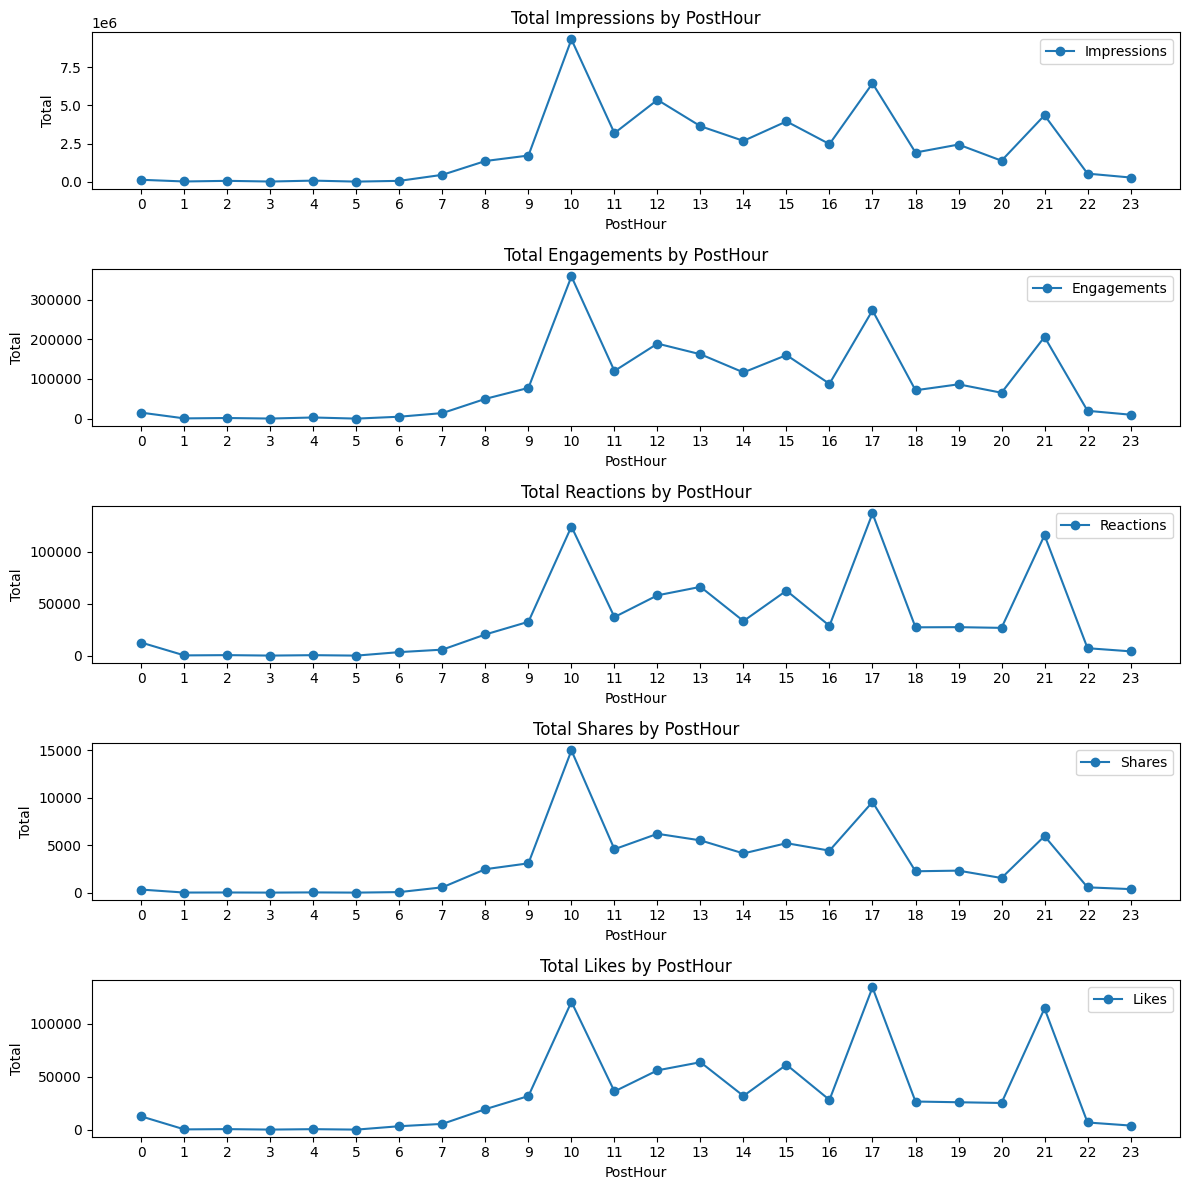

In [ ]:
grouped_data = data.groupby('PostHour')[['Impressions', 'Engagements', 'Likes', 'Shares', 'Reactions']].sum()

hours = list(range(24))

sorted_data = grouped_data.sort_values(by='PostHour')

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 12))

plt.subplots_adjust(hspace=0.5)

for i, metric in enumerate(['Impressions', 'Engagements', 'Reactions', 'Shares', 'Likes']):
    ax = axes[i]

    ax.plot(hours, sorted_data[metric], label=metric, marker='o')

    ax.set_title(f'Total {metric} by PostHour')
    ax.set_xlabel('PostHour')
    ax.set_ylabel('Total')
    ax.set_xticks(hours)

    ax.legend()


plt.tight_layout()

plt.show()

Yearly and Monthly Analysis

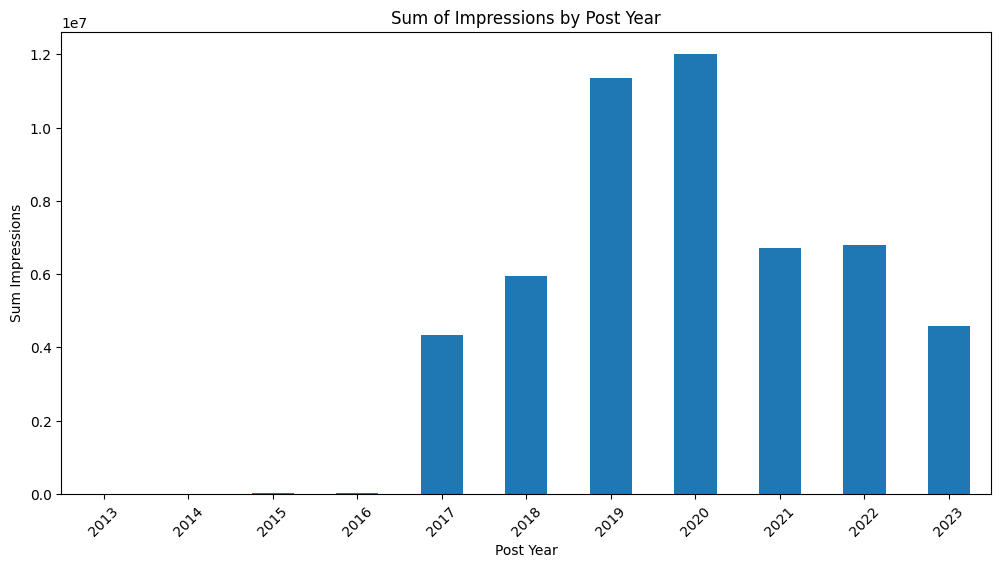

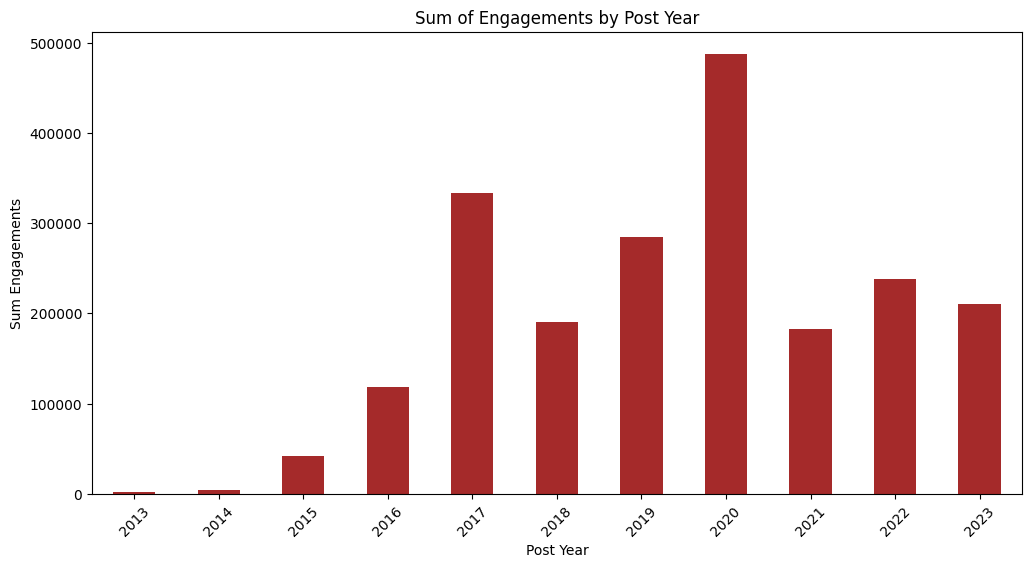

In [ ]:
yearly_sum = data.groupby('PostYear')[['Impressions', 'Engagements']].sum()

monthly_sum = data.groupby(['PostYear', 'PostMonth'])['Impressions'].sum().unstack()

monthly_engagement_sum =data.groupby(['PostYear', 'PostMonth'])['Engagements'].sum().unstack()

yearly_sum['Impressions'].plot(kind='bar', figsize=(12, 6))
plt.title('Sum of Impressions by Post Year')
plt.xlabel('Post Year')
plt.ylabel('Sum Impressions')
plt.xticks(rotation=45)
plt.show()

yearly_sum['Engagements'].plot(kind='bar', figsize=(12, 6), color='brown')
plt.title('Sum of Engagements by Post Year')
plt.xlabel('Post Year')
plt.ylabel('Sum Engagements')
plt.xticks(rotation=45)
plt.show()


Top Performing Years

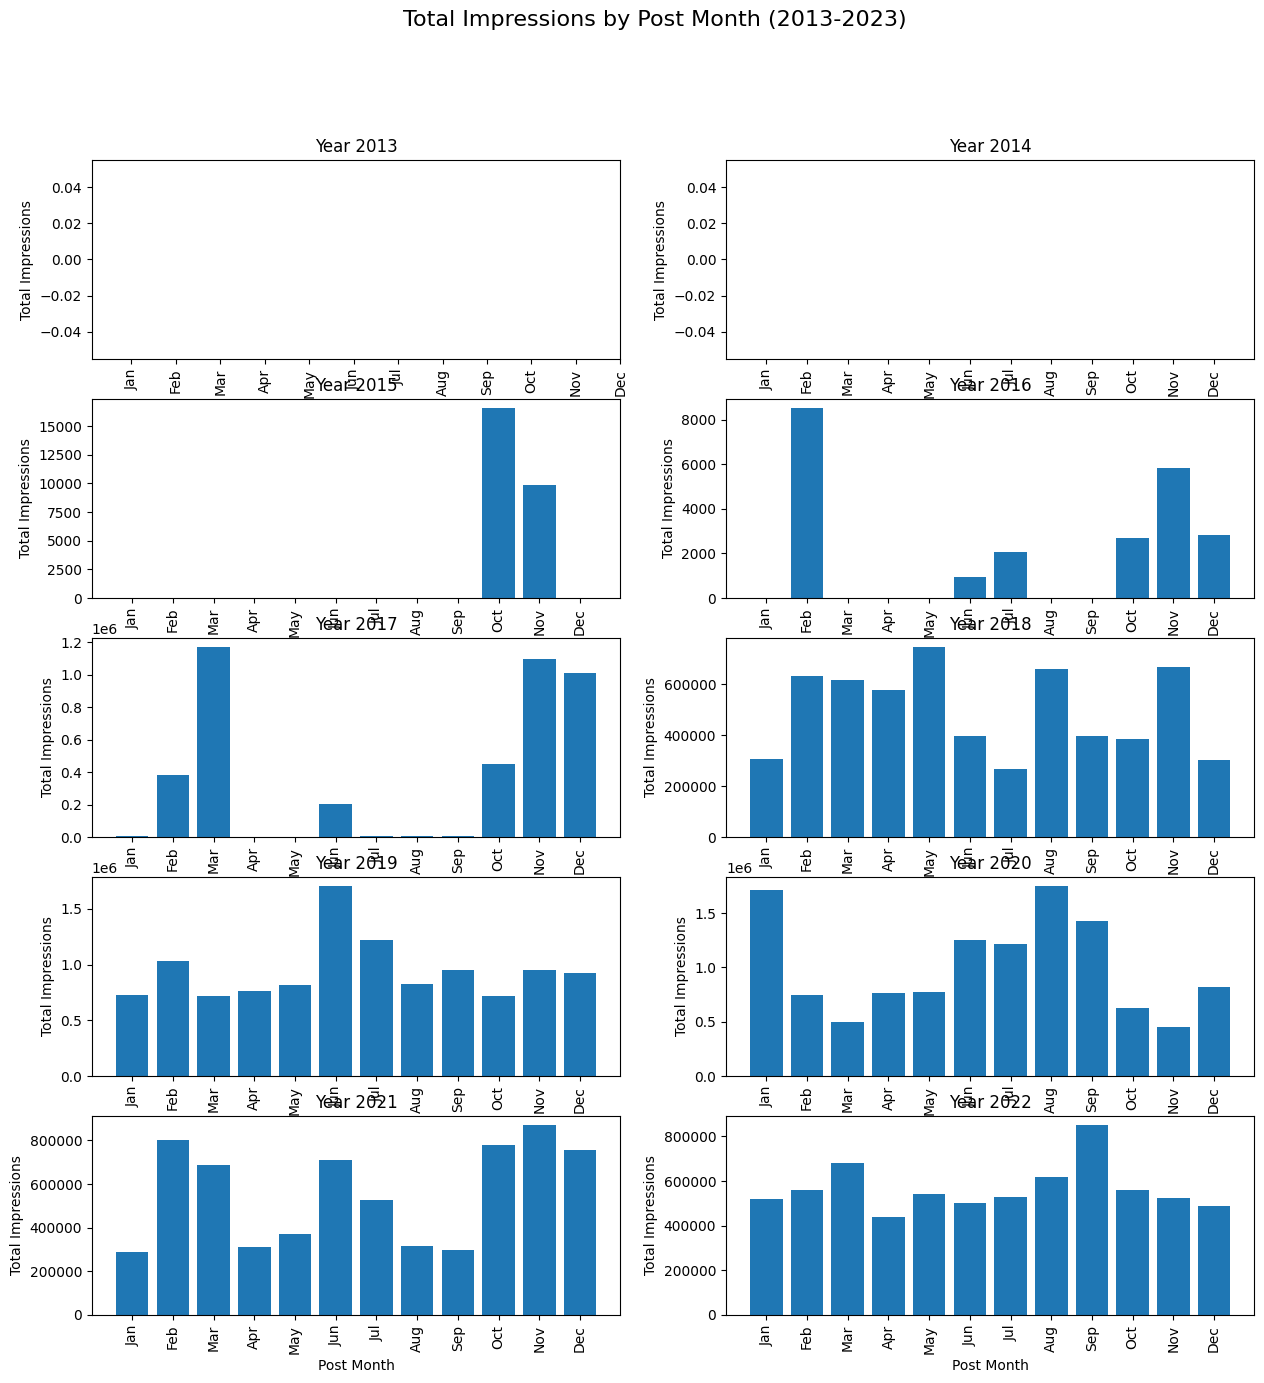

<Figure size 640x480 with 0 Axes>

In [ ]:
start_year = 2013
end_year = 2023

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
fig.suptitle('Total Impressions by Post Month (2013-2023)', fontsize=16)

for year,ax in zip(range(start_year, end_year + 1),axes.flat):
    
    filtered_data = data[data['PostYear'] == year]

    monthly_impressions_year = filtered_data.groupby('PostMonth')['Impressions'].sum()
    
    # Create a bar chart for the current year
    ax.bar(monthly_impressions_year.index, monthly_impressions_year.values)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Post Month')
    ax.set_ylabel('Total Impressions')
    ax.set_xticks(range(0, 12))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)

# Adjust layout
plt.tight_layout
plt.show()
plt.subplots_adjust(top=0.95)

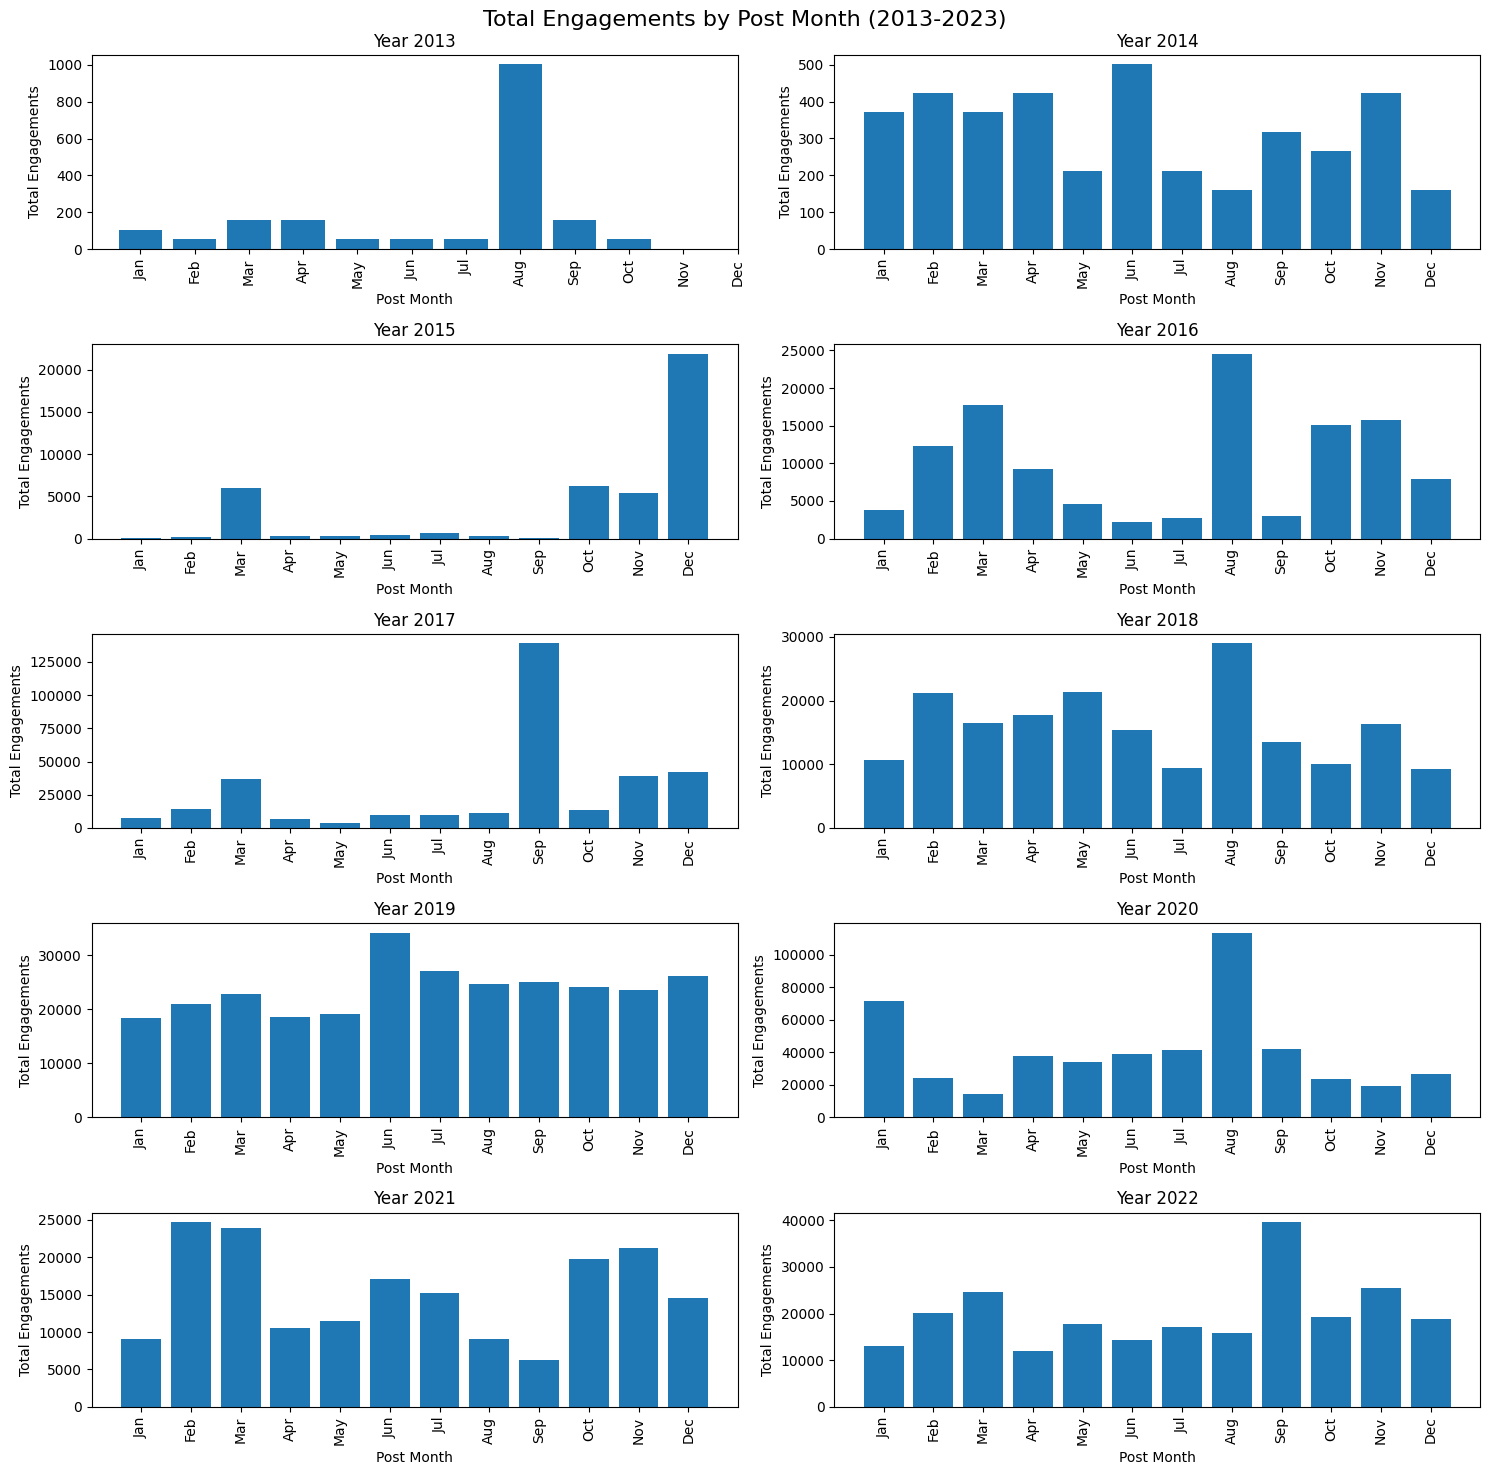

In [ ]:
start_year = 2013
end_year = 2023

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
fig.suptitle('Total Engagements by Post Month (2013-2023)', fontsize=16)

for year,ax in zip(range(start_year, end_year + 1),axes.flat):
    
    filtered_data = data[data['PostYear'] == year]

    monthly_impressions_year = filtered_data.groupby('PostMonth')['Engagements'].sum()
    
    # Create a bar chart for the current year
    ax.bar(monthly_impressions_year.index, monthly_impressions_year.values)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Post Month')
    ax.set_ylabel('Total Engagements')
    ax.set_xticks(range(0, 12))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Show the plots
plt.show()

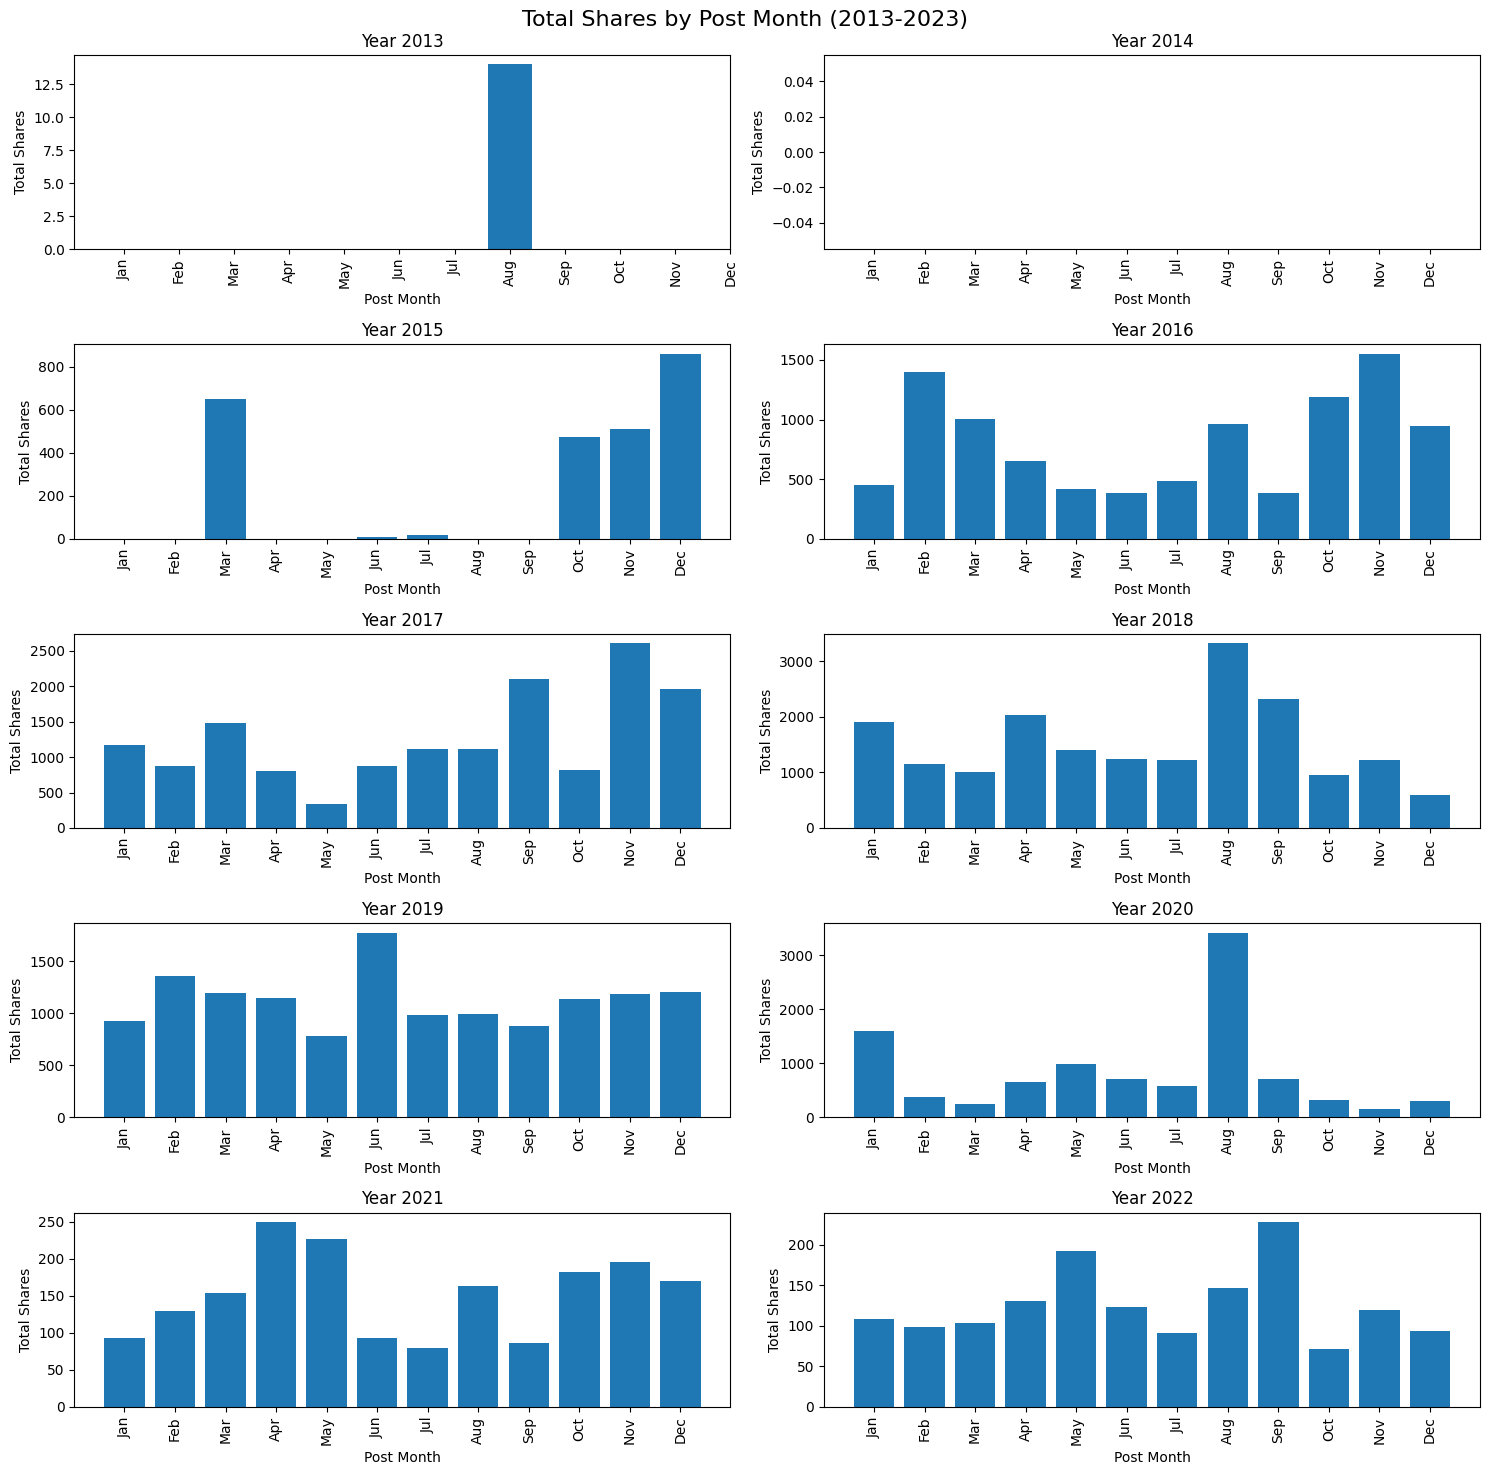

In [ ]:
start_year = 2013
end_year = 2023

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
fig.suptitle('Total Shares by Post Month (2013-2023)', fontsize=16)

for year,ax in zip(range(start_year, end_year + 1),axes.flat):
    
    filtered_data = data[data['PostYear'] == year]

    monthly_impressions_year = filtered_data.groupby('PostMonth')['Shares'].sum()
    
    # Create a bar chart for the current year
    ax.bar(monthly_impressions_year.index, monthly_impressions_year.values)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Post Month')
    ax.set_ylabel('Total Shares')
    ax.set_xticks(range(0, 12))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Show the plots
plt.show()

Top Performing Years

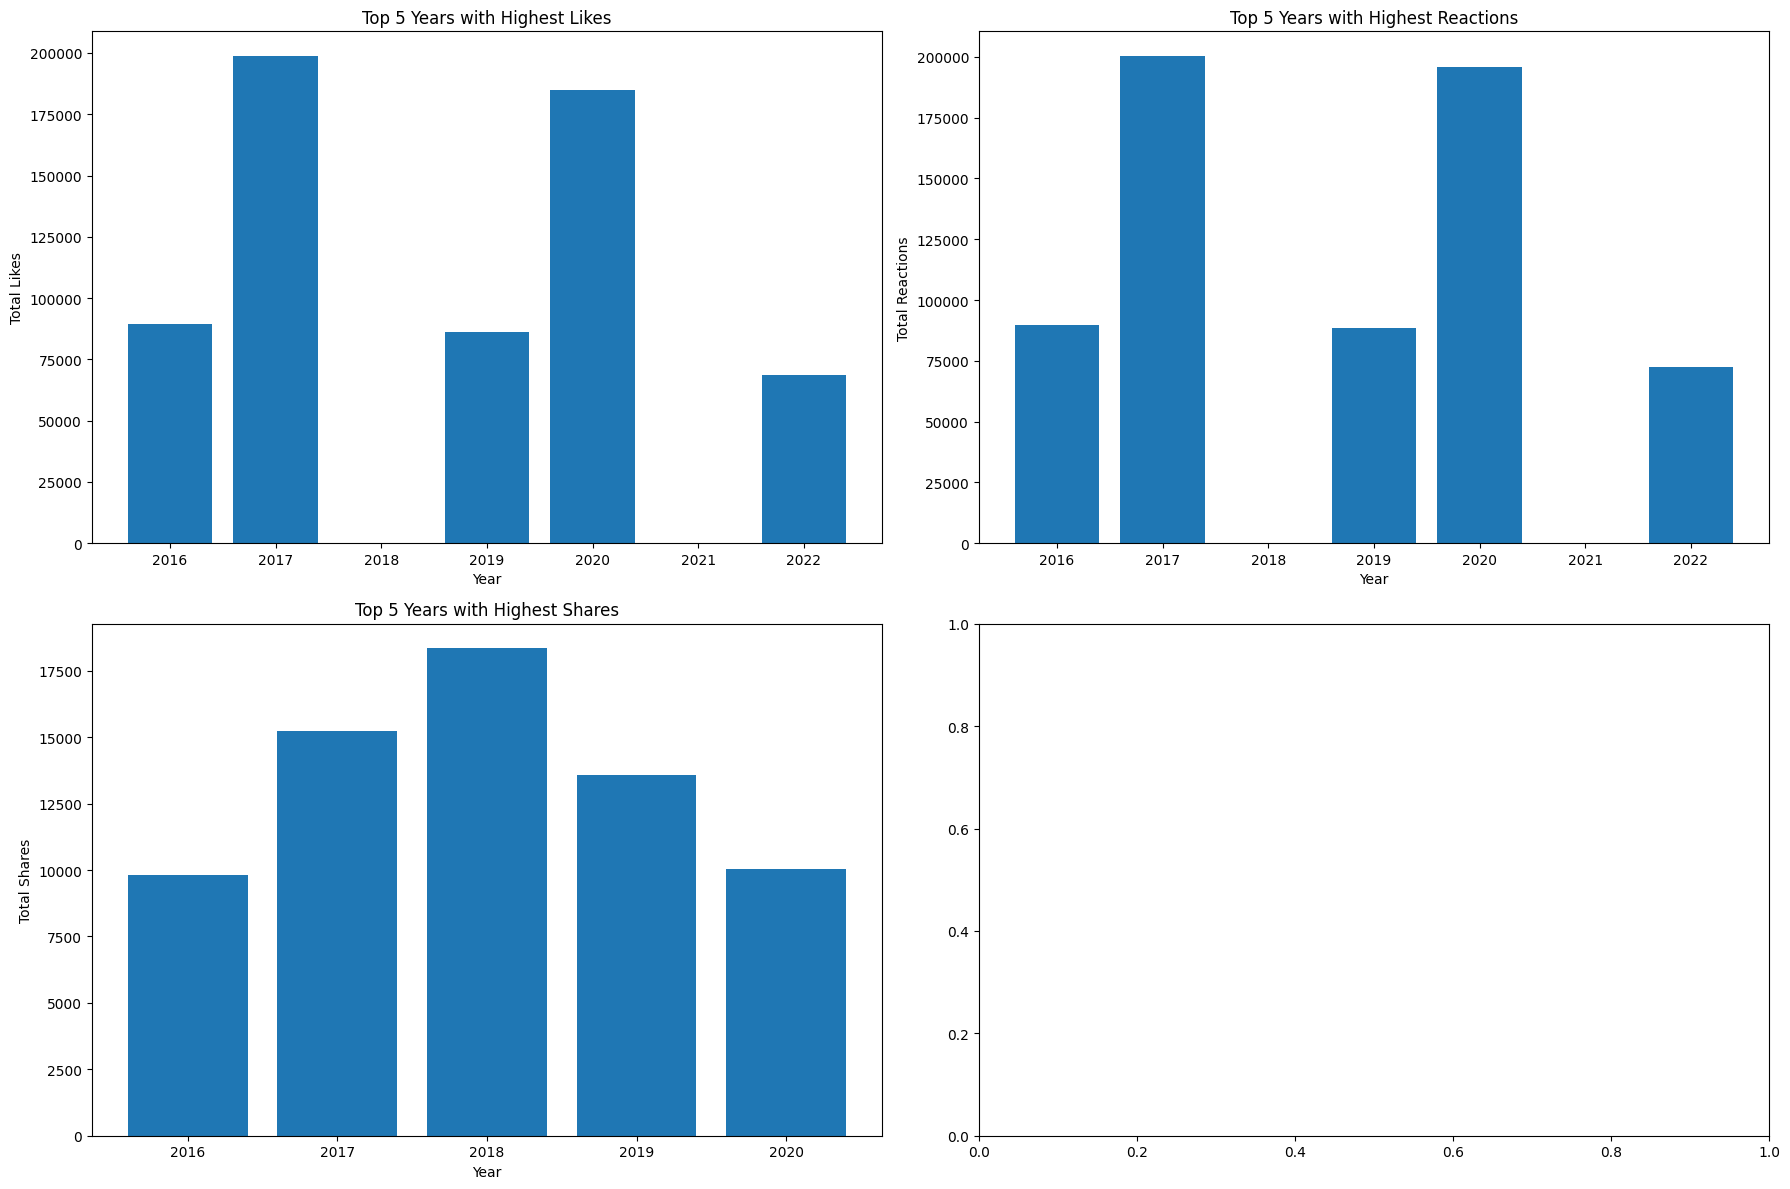

In [ ]:
yearly_data = data.groupby('PostYear')[['Likes', 'Reactions', 'Shares']].sum()

sorted_yearly_data = {}
for metric in ['Likes', 'Reactions', 'Shares']:
    sorted_yearly_data[metric] = yearly_data.sort_values(by=metric, ascending=False)

top_5_years = {}
for metric in ['Likes', 'Reactions', 'Shares']:
    top_5_years[metric] = sorted_yearly_data[metric].head(5)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

for i, metric in enumerate(['Likes', 'Reactions', 'Shares']):
    ax = axes[i // 2, i % 2]
    ax.bar(top_5_years[metric].index, top_5_years[metric][metric])
    ax.set_title(f'Top 5 Years with Highest {metric}')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'Total {metric}')

plt.tight_layout()

plt.show()

Additional Metrics Visualization

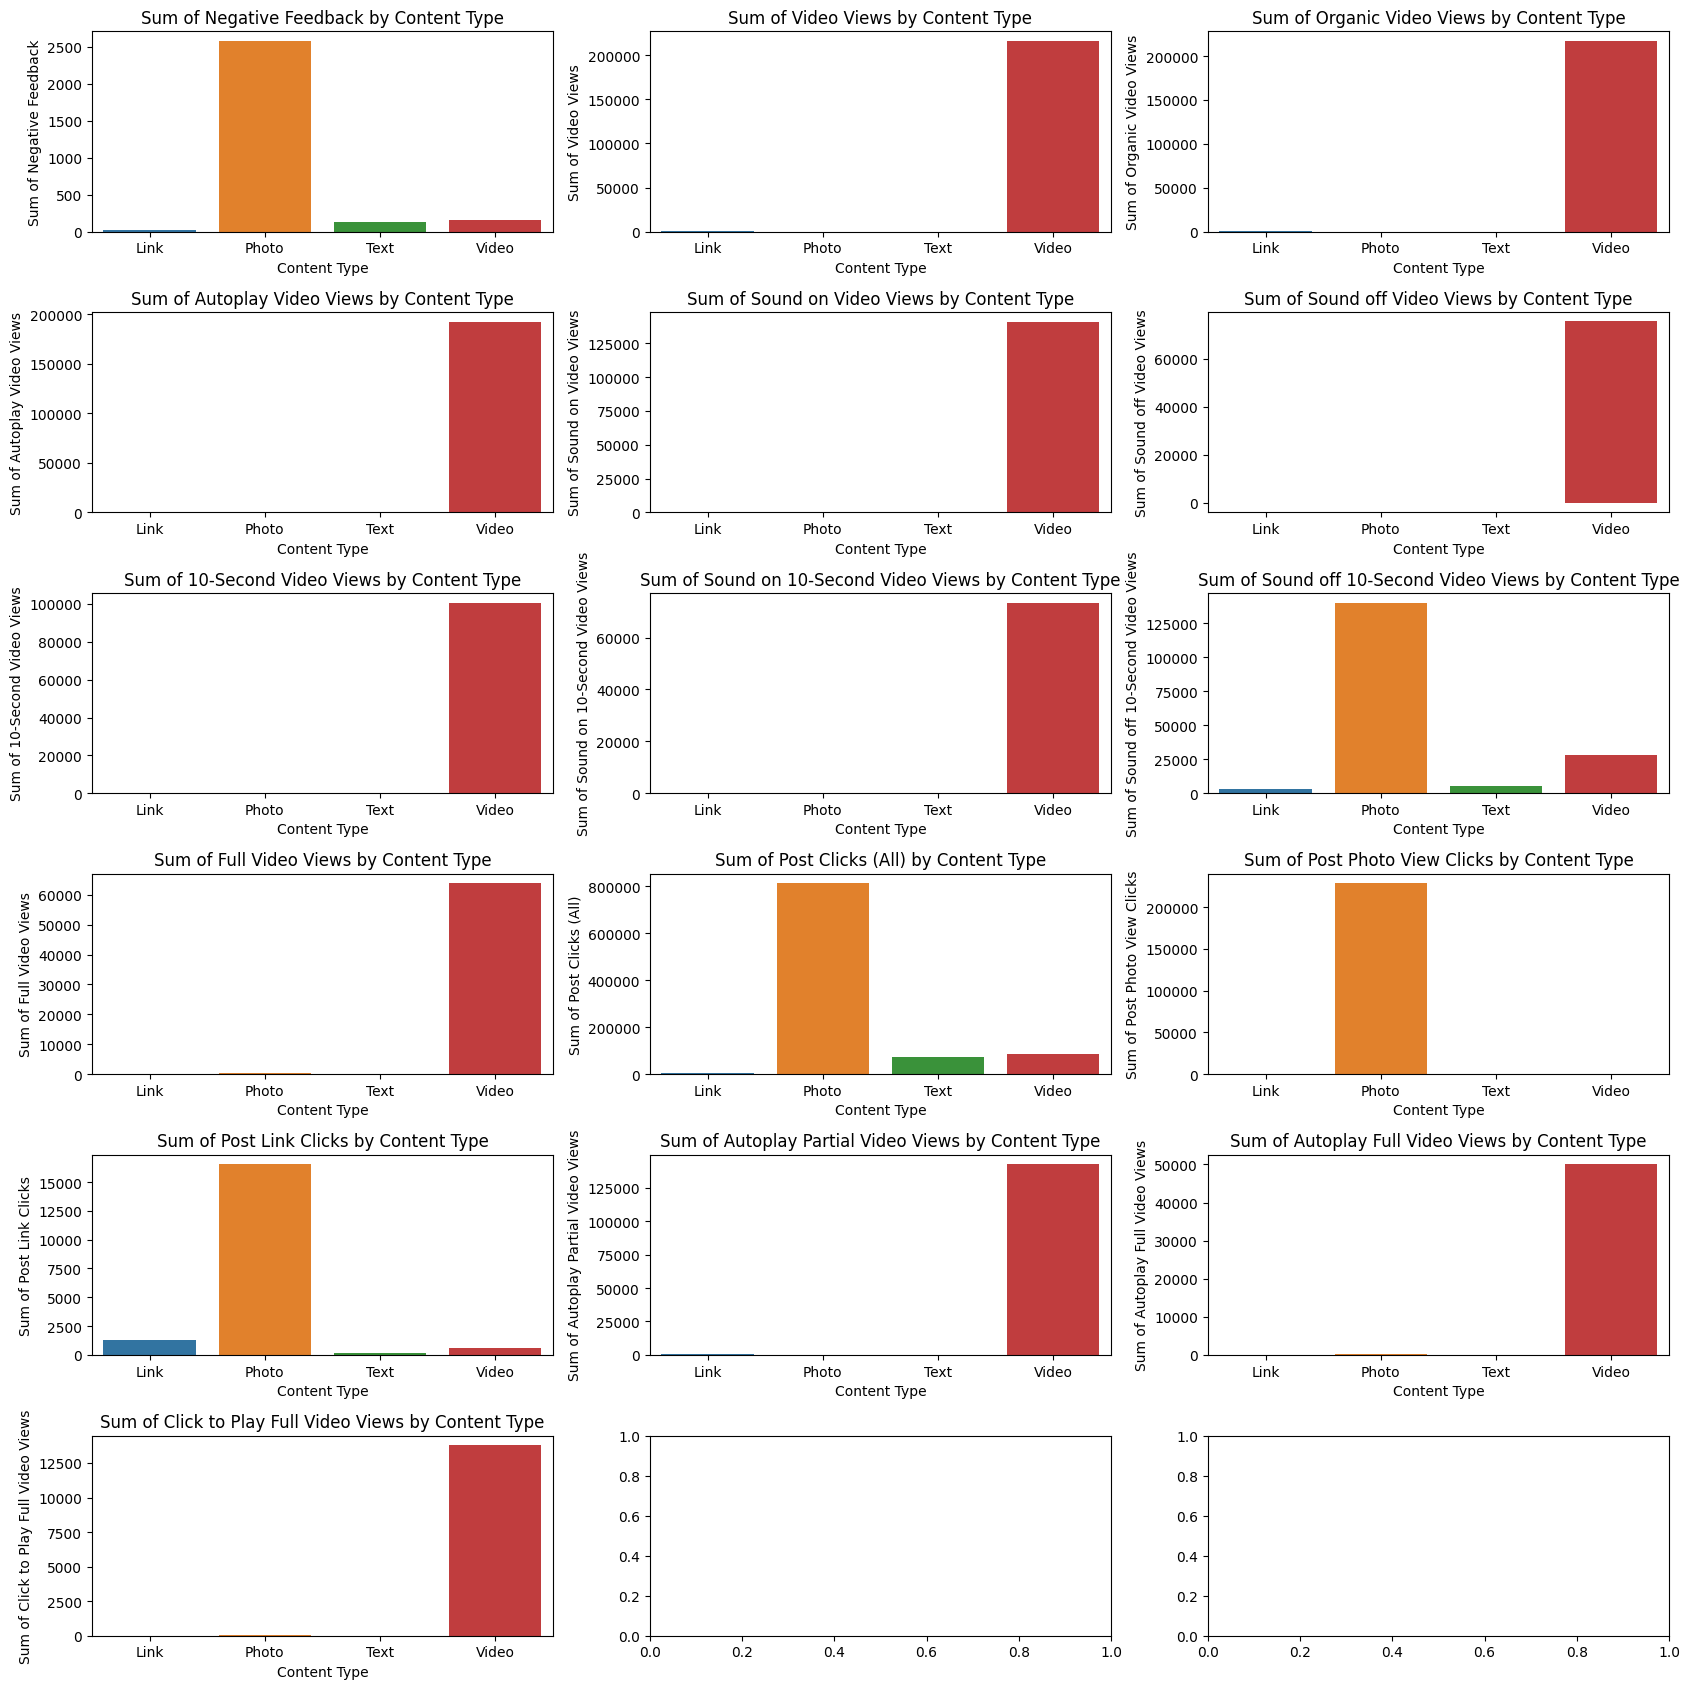

In [ ]:
metrics_to_visualize = [
    'Negative Feedback',
    'Video Views',
    'Organic Video Views',
    'Autoplay Video Views',
    'Sound on Video Views',
    'Sound off Video Views',
    '10-Second Video Views',
    'Sound on 10-Second Video Views',
    'Sound off 10-Second Video Views',
    'Full Video Views',
    'Post Clicks (All)',
    'Post Photo View Clicks',
    'Post Link Clicks',
    'Autoplay Partial Video Views',
    'Autoplay Full Video Views',
    'Click to Play Full Video Views'
]

sums_df = pd.DataFrame(columns=["Content Type"] + metrics_to_visualize)

for content_type, content_group in data.groupby("Content Type"):
    sum_values = [content_type]

    for column in metrics_to_visualize:
        column_sum = content_group[column].sum()
        sum_values.append(column_sum)

    sums_df.loc[len(sums_df)] = sum_values

# Create a subplot object with 5 rows and 3 columns
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(17, 17))

# Plot each metric in a separate subplot
for i, column in enumerate(metrics_to_visualize):
    ax = axes[i // 3, i % 3]
    sns.barplot(x='Content Type', y=column, data=sums_df, ax=ax)
    ax.set_title(f"Sum of {column} by Content Type")
    ax.set_xlabel("Content Type")
    ax.set_ylabel(f"Sum of {column}")

# Tighten the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

Top Performing Months

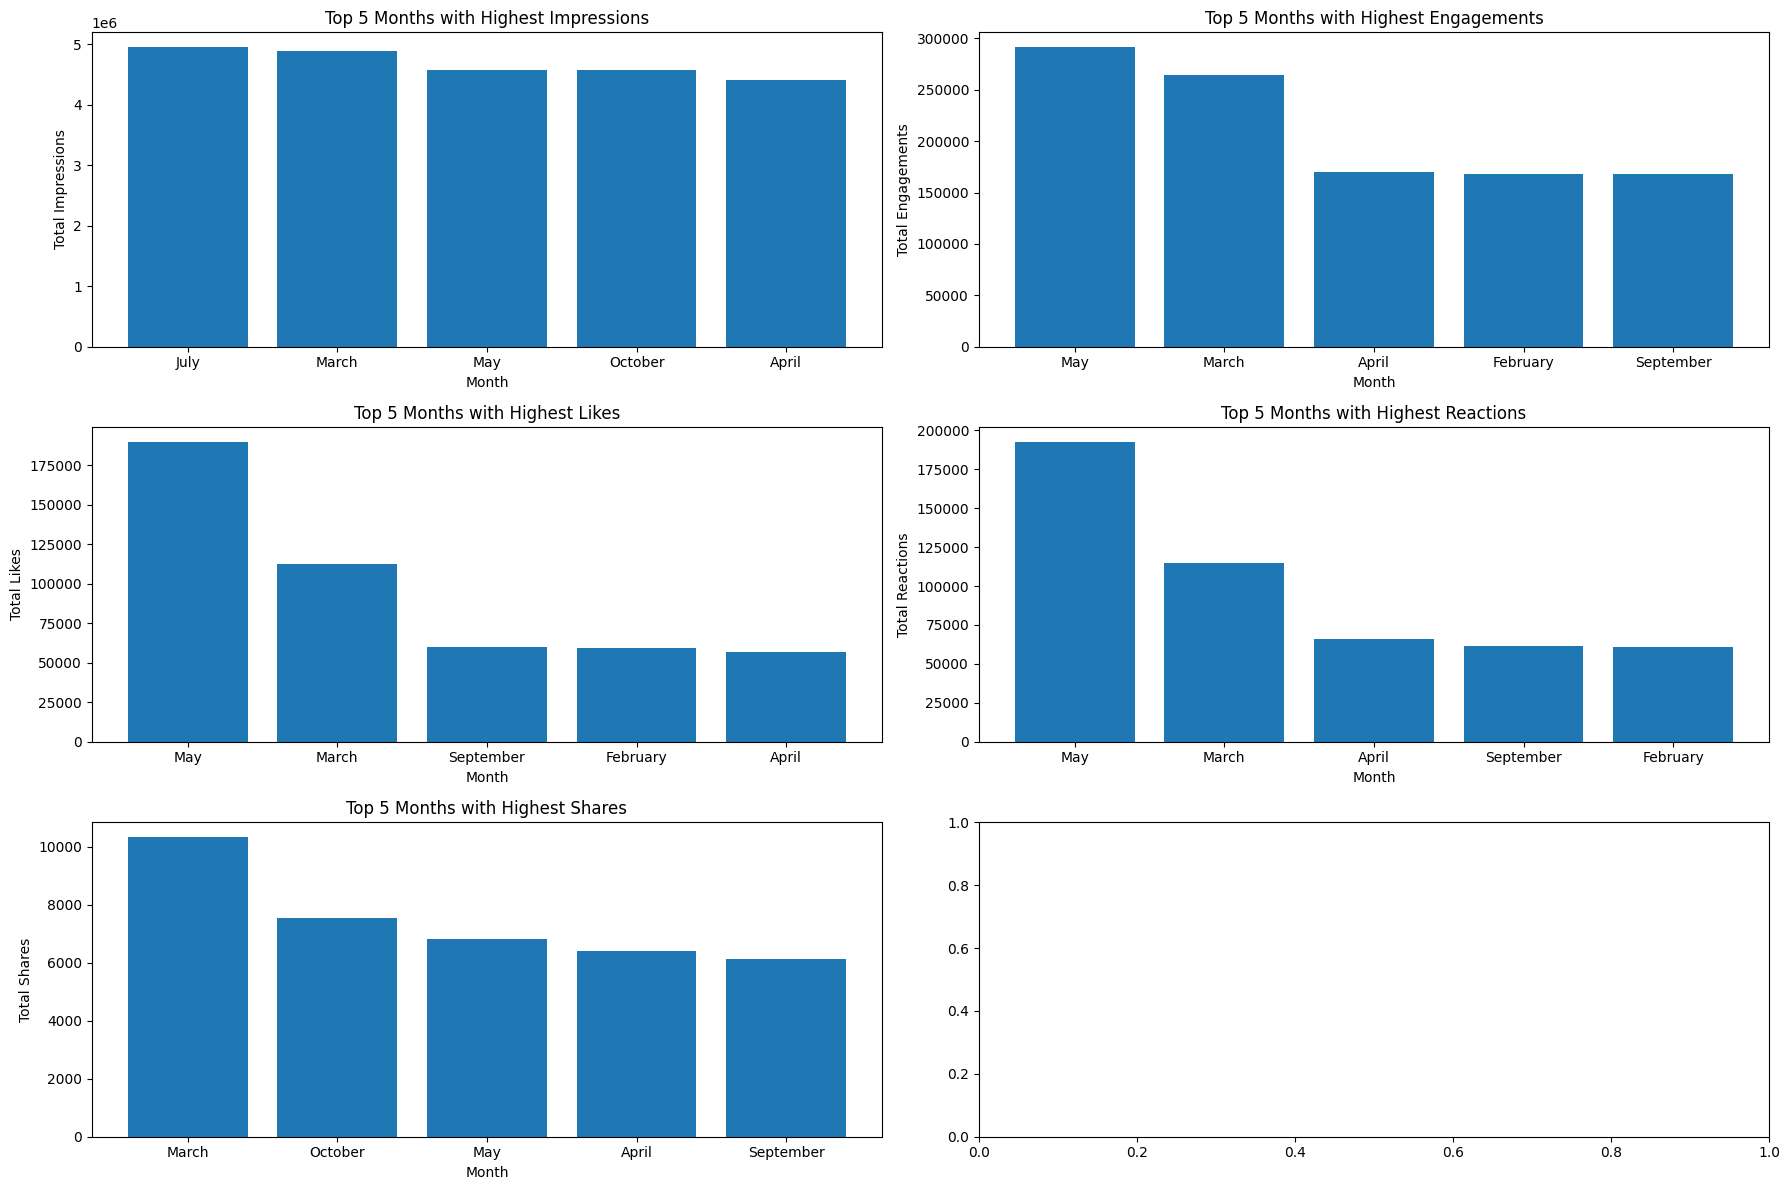

In [ ]:
monthly_data = data.groupby('PostMonth')[['Impressions', 'Engagements', 'Likes', 'Reactions', 'Shares']].sum()

sorted_monthly_data = {}
for metric in ['Impressions', 'Engagements', 'Likes', 'Reactions', 'Shares']:
    sorted_monthly_data[metric] = monthly_data.sort_values(by=metric, ascending=False)

top_5_months = {}
for metric in ['Impressions', 'Engagements', 'Likes', 'Reactions', 'Shares']:
    top_5_months[metric] = sorted_monthly_data[metric].head(5)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

for i, metric in enumerate(['Impressions', 'Engagements', 'Likes', 'Reactions', 'Shares']):
    ax = axes[i // 2, i % 2]
    ax.bar(top_5_months[metric].index, top_5_months[metric][metric])
    ax.set_title(f'Top 5 Months with Highest {metric}')
    ax.set_xlabel('Month')
    ax.set_ylabel(f'Total {metric}')

plt.tight_layout()

plt.show()